NAMA : FAUZAN NAUFAL RIZQI


# PREPROCESSING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Memuat dataset
df = pd.read_csv('/content/dewa_vs_borneo_stats.csv')

# Konversi timestamp ke bentuk tanggal
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirthTimestamp'], unit='s')

# Drop beberapa kolom yang kemungkinan tidak akan dipakai
df = df.drop(columns=['shirtNumber', 'jerseyNumber', 'jerseyNumber.1', 'slug', 'id', 'marketValueCurrency', 'alpha2', 'alpha3', 'ratingVersions', 'dateOfBirthTimestamp'])

In [ ]:
# Preview dataset
print(df.dtypes)
print(df.head())

position                              object
substitute                              bool
name                                  object
shortName                             object
position.1                            object
userCount                              int64
country_name                          object
totalPass                            float64
accuratePass                         float64
totalLongBalls                       float64
accurateLongBalls                    float64
goalAssist                           float64
totalCross                           float64
accurateCross                        float64
aerialLost                           float64
aerialWon                            float64
duelLost                             float64
duelWon                              float64
challengeLost                        float64
totalContest                         float64
wonContest                           float64
shotOffTarget                        float64
onTargetSc

In [ ]:
# Mengisi nilai NaN pada data numerik
df = df.fillna(0)

# Check nilai NaN
nan_info = df.isna().sum()
print(nan_info)

has_nan = df.isna().any().any()
print(f"DataFrame mengandung nilai NaN: {has_nan}")

position                      0
substitute                    0
name                          0
shortName                     0
position.1                    0
userCount                     0
country_name                  0
totalPass                     0
accuratePass                  0
totalLongBalls                0
accurateLongBalls             0
goalAssist                    0
totalCross                    0
accurateCross                 0
aerialLost                    0
aerialWon                     0
duelLost                      0
duelWon                       0
challengeLost                 0
totalContest                  0
wonContest                    0
shotOffTarget                 0
onTargetScoringAttempt        0
goals                         0
totalClearance                0
outfielderBlock               0
totalTackle                   0
errorLeadToAShot              0
ownGoals                      0
wasFouled                     0
fouls                         0
totalOff

In [ ]:
position_column1 = 'position'
position_column2 = 'position.1'

# Menemukan baris yang value kolom posisi berbeda
mismatch_rows = df[df[position_column1] != df[position_column2]]

print("Rows where position columns differ:")
print(mismatch_rows)

print("Indices of rows where position columns differ:")
print(mismatch_rows.index.tolist())

Rows where position columns differ:
   position  substitute                   name      shortName position.1  \
1         D       False            Robi Darwis      R. Darwis          M   
5         M       False  Rangga Muslim Perkasa  R. M. Perkasa          F   
8         F       False         Feby Eka Putra    F. E. Putra          M   
10        F       False            OJ Porteria    O. Porteria          M   
13        F        True      Dimitrios Kolovos     D. Kolovos          M   

    userCount country_name  totalPass  accuratePass  totalLongBalls  ...  \
1          39    Indonesia       35.0          27.0             5.0  ...   
5           7    Indonesia       18.0          17.0             0.0  ...   
8          11    Indonesia        7.0           7.0             0.0  ...   
10         12  Philippines       11.0           8.0             4.0  ...   
13        196       Greece        5.0           5.0             0.0  ...   

    interceptionWon  bigChanceMissed  keyPass  exp

Pada dataset terdapat dua kolom dengan nama yang sama yaitu position. Diatas ini adalah program untuk melihat apakah kedua kolom ini sama persis, jika ya akan drop salah satu kolom.

**Result** : Terdapat beberapa perbedaan yang unik, sehingga sementara kedua kolom position ini dibiarkan dahulu dengan asumsi kolom posisi pertama merupakan posisi default pemain, dan kolom posisi kedua merupakan posisi saat dimainkan khususnya di match tersebut

# INSIGHT

1. Bagaimana performansi secara keseluruhan dari kedua tim ?
2. Bagaimana performansi secara keseluruhan dari kedua tim berdasarkan posisi pemain ?
3. Bagaimana akurasi Passing dari masing-masing tim ?
4. Bagaimana akurasi shooting dari masing-masing tim ?
5. Bagaimana hasil duel di udara dari masing-masing tim ?
6. Apa saja poin kelemahan dan kekuatan masing-masing tim ?
7. Melihat detail statistik performa salah satu pemain
8. Bagaimana kedisiplinan masing-masing tim ?

## Performansi secara keseluruhan dari kedua tim



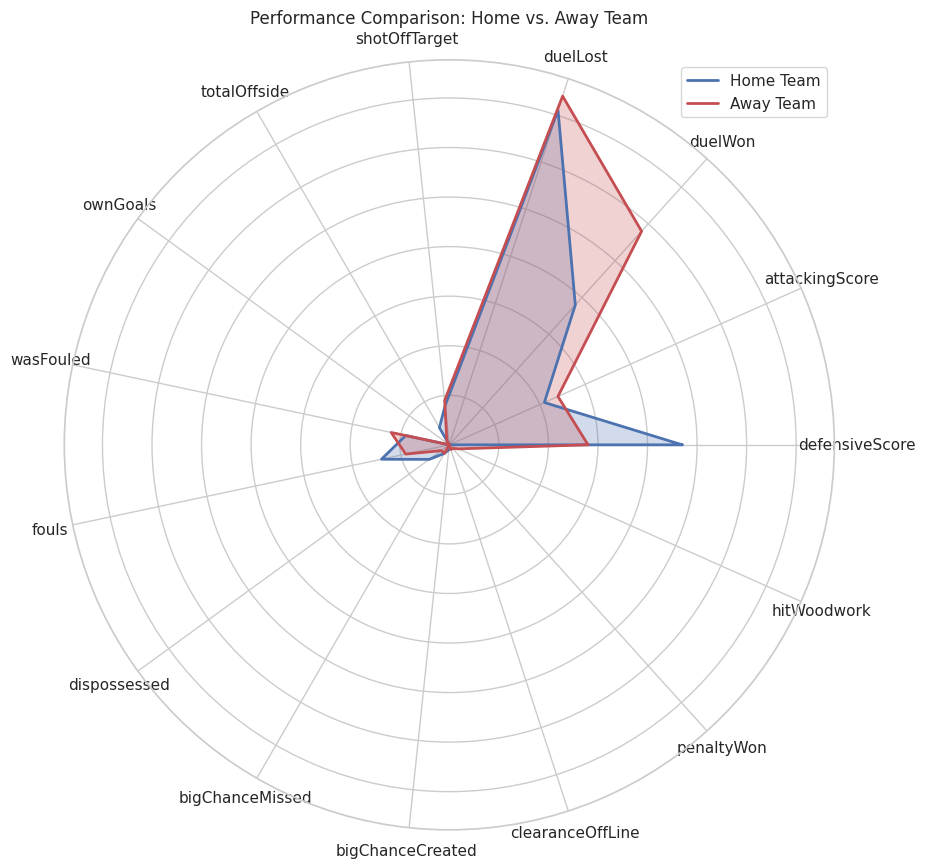

In [ ]:
# Gabungkan beberapa metrics (Sesuaikan)
df['defensiveScore'] = (df['interceptionWon'] + df['totalTackle'] +
                        df['totalClearance'] + df['outfielderBlock'] +
                        df['saves'] + df['goodHighClaim'] +
                        df['totalKeeperSweeper'])
df['attackingScore'] = (df['goals'] + df['goalAssist'] +
                        df['onTargetScoringAttempt'] + df['keyPass'])

metrics = [
    'defensiveScore', 'attackingScore',
    'duelWon', 'duelLost', 'shotOffTarget', 'totalOffside',
    'ownGoals', 'wasFouled', 'fouls', 'dispossessed',
    'bigChanceMissed', 'bigChanceCreated', 'clearanceOffLine', 'penaltyWon', 'hitWoodwork'
]

# Aggregate metrics untuk home and away
home_team_stats = df[df['team'] == 'home'].groupby('team')[metrics].mean().reset_index()
away_team_stats = df[df['team'] == 'away'].groupby('team')[metrics].mean().reset_index()

# Fungsu untuk plot radar chart yang membandinkan home and away
def plot_comparison_radar_chart(home_stats, away_stats):
    num_vars = len(metrics)

    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Home team
    home_values = home_stats[metrics].values.flatten().tolist()
    home_values += home_values[:1]
    ax.plot(angles, home_values, label='Home Team', linewidth=2, linestyle='solid', color='b')
    ax.fill(angles, home_values, color='b', alpha=0.25)

    # Away team
    away_values = away_stats[metrics].values.flatten().tolist()
    away_values += away_values[:1]
    ax.plot(angles, away_values, label='Away Team', linewidth=2, linestyle='solid', color='r')
    ax.fill(angles, away_values, color='r', alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, rotation=45)

    plt.title('Performance Comparison: Home vs. Away Team')
    plt.legend(loc='best')
    plt.show()

# Plot radar chart
plot_comparison_radar_chart(home_team_stats, away_team_stats)

Insight ini memberikan perbandingan visual yang komprehensif antara performa tim tuan rumah (Home Team) dan tim tamu (Away Team) dalam berbagai aspek permainan sepak bola. Diagram radar ini sangat berguna untuk:

1. Mengidentifikasi kekuatan dan kelemahan relatif kedua tim.
2. Melihat area-area di mana satu tim unggul dibanding tim lainnya.
3. Memahami gaya permainan dan strategi masing-masing tim.

Hasil analisis dari diagram:

1. Defensive Score: Tim tuan rumah memiliki skor defensif yang jauh lebih tinggi, menunjukkan pertahanan yang lebih solid.

2. Attacking Score: Tim tamu memiliki skor menyerang yang sedikit lebih tinggi, menandakan mereka lebih agresif dalam serangan.

3. Duel Won & Lost: Tim tamu menang lebih banyak duel namun juga kalah lebih banyak, menunjukkan permainan yang lebih intens dalam pertarungan satu lawan satu.

4. Shot Off Target: Tim tamu memiliki lebih banyak tembakan melenceng, mungkin menandakan mereka lebih banyak mencoba peluang tapi kurang akurat.

5. Total Offside: Tim tamu sedikit lebih sering terjebak offside, mungkin karena gaya permainan yang lebih agresif.

6. Fouls & Was Fouled: Kedua tim relatif seimbang dalam hal pelanggaran yang dilakukan dan diterima.

7. Big Chance Created & Missed: Tim tamu menciptakan dan melewatkan lebih banyak peluang besar, menunjukkan mereka lebih banyak mengancam gawang lawan tapi juga kurang efisien.

8. Dispossessed: Tim tamu sedikit lebih sering kehilangan bola.

Kesimpulan:
Tim tuan rumah tampak lebih fokus pada pertahanan yang solid, sementara tim tamu lebih agresif dalam menyerang namun kurang efisien. Insight ini dapat digunakan oleh pelatih untuk menyusun strategi, mengidentifikasi area yang perlu perbaikan, dan memahami dinamika pertandingan secara keseluruhan.

## Performansi secara keseluruhan dari kedua tim berdasarkan posisi pemain

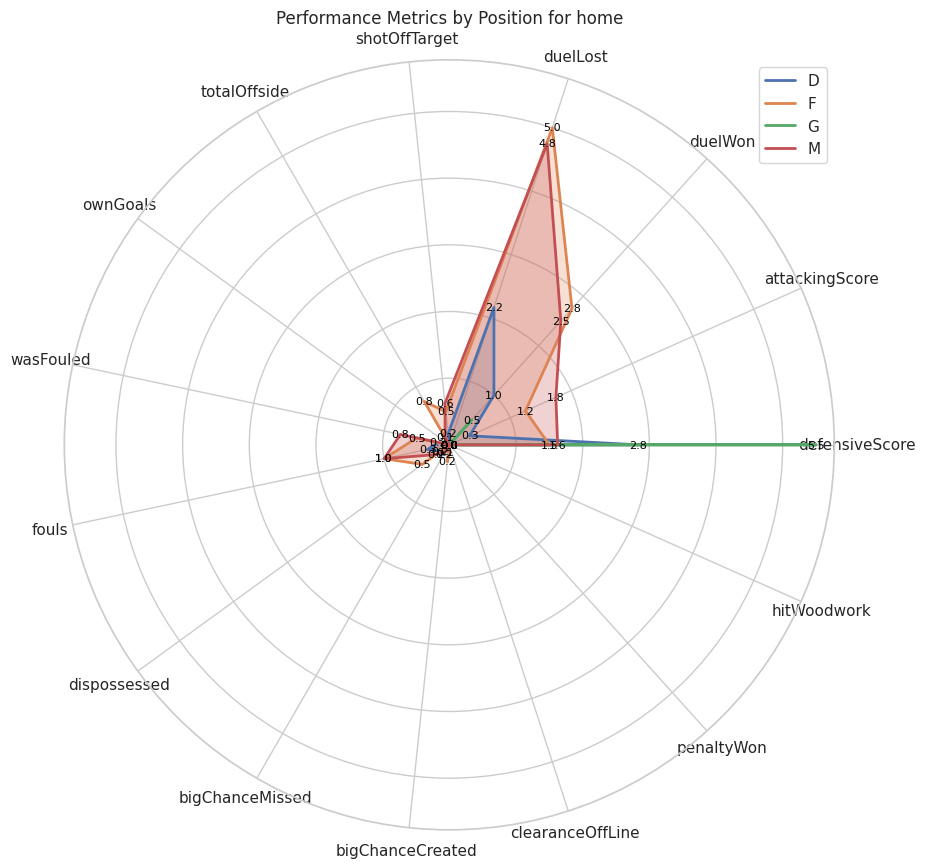

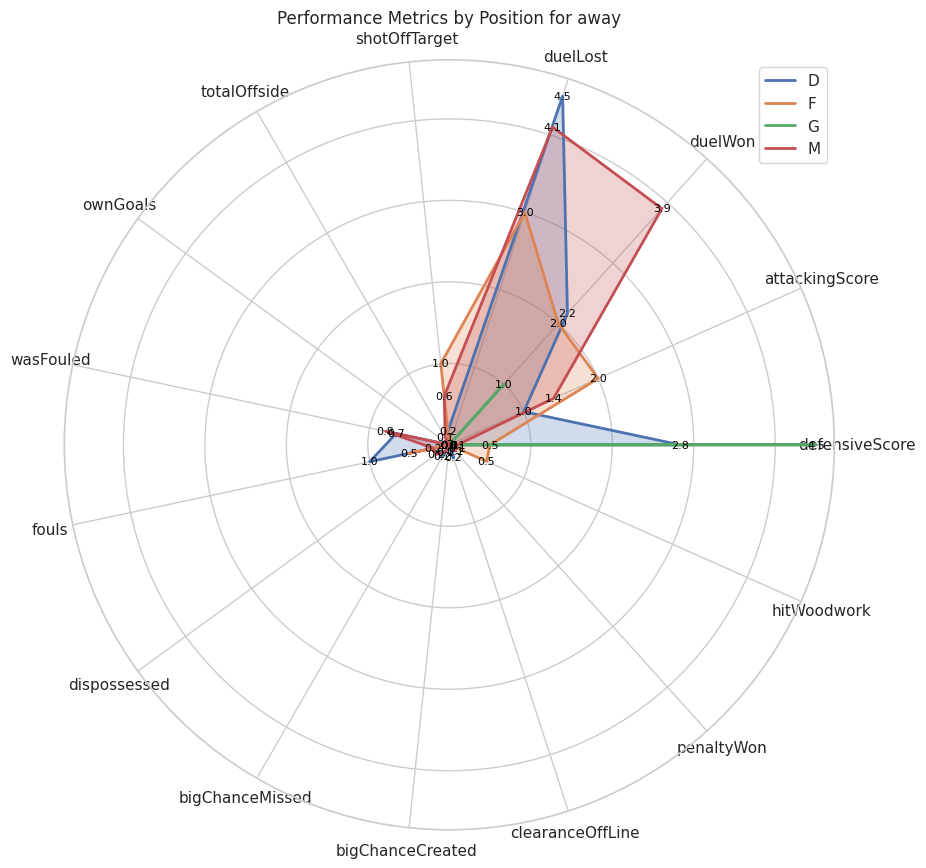

In [ ]:
metrics = [
    'defensiveScore', 'attackingScore',
    'duelWon', 'duelLost', 'shotOffTarget', 'totalOffside',
    'ownGoals', 'wasFouled', 'fouls', 'dispossessed',
    'bigChanceMissed', 'bigChanceCreated', 'clearanceOffLine', 'penaltyWon', 'hitWoodwork'
]

# Membuat DataFrame untuk menyimpan metrik rata-rata berdasarkan posisi dan tim
performance_by_position_team = df.groupby(['team', 'position.1'])[metrics].mean().reset_index()

# Berfungsi untuk memplot grafik radar untuk posisi tim
def plot_radar_chart(team_df, team_name):
    num_vars = len(metrics)

    # Menghitung sudut untuk setiap sumbu
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for position in team_df['position.1'].unique():
        stats = team_df[team_df['position.1'] == position][metrics].values.flatten().tolist()
        stats += stats[:1]

        ax.plot(angles, stats, label=position, linewidth=2, linestyle='solid')
        ax.fill(angles, stats, alpha=0.25)

        # Menambahkan values
        for i in range(num_vars):
            ax.text(angles[i], stats[i], f'{stats[i]:.1f}', ha='center', va='center', fontsize=8, color='black')

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, rotation=45)

    plt.title(f'Performance Metrics by Position for {team_name}')
    plt.legend(loc='best')
    plt.show()

# Plot grafik radar untuk setiap tim
teams = df['team'].unique()
for team in teams:
    team_df = performance_by_position_team[performance_by_position_team['team'] == team]
    plot_radar_chart(team_df, team)

## Akurasi Passing dari masing-masing tim

<ipython-input-250-942eb646659c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='passAccuracy', data=team_pass_accuracy, palette='viridis')


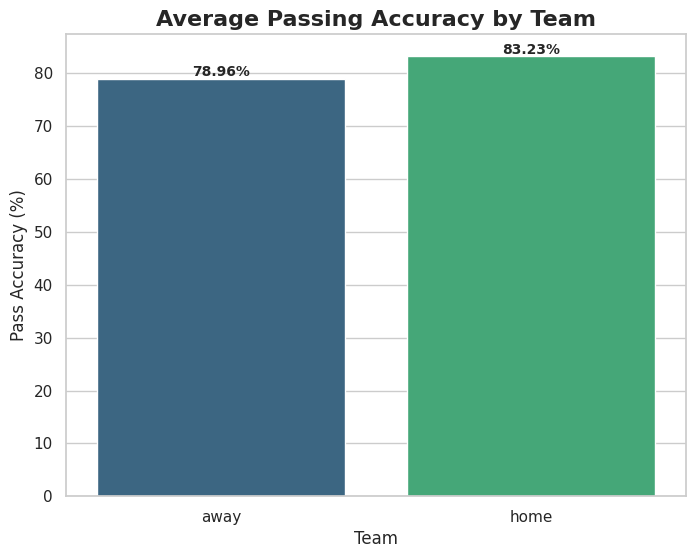

In [ ]:
# Hitung akurasi passing untuk setiap tim
df['passAccuracy'] = df['accuratePass'] / df['totalPass'] * 100
team_pass_accuracy = df.groupby('team')['passAccuracy'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x='team', y='passAccuracy', data=team_pass_accuracy, palette='viridis')

plt.title('Average Passing Accuracy by Team', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Pass Accuracy (%)', fontsize=12)

for index, value in enumerate(team_pass_accuracy['passAccuracy']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontweight='bold', fontsize=10)

# Tampilkan visualisasi
plt.show()

Gambar ini menunjukkan perbandingan akurasi passing rata-rata antara tim tamu (away) dan tim tuan rumah (home). Berikut analisis dari data yang ditampilkan:

1. Tim tuan rumah (home) memiliki akurasi passing rata-rata sebesar 83.23%.
2. Tim tamu (away) memiliki akurasi passing rata-rata sebesar 78.96%.
3. Tim tuan rumah unggul dalam hal akurasi passing dengan selisih sekitar 4.27%.

Insight dan implikasi dari data ini:

1. Kontrol Bola: Tim tuan rumah menunjukkan kontrol bola yang lebih baik, yang bisa mengindikasikan penguasaan permainan yang lebih dominan.

2. Gaya Permainan: Akurasi passing yang lebih tinggi pada tim tuan rumah mungkin menandakan gaya permainan yang lebih mengandalkan umpan pendek dan possession-based.

3. Tekanan Pertandingan: Tim tuan rumah tampaknya lebih nyaman dalam mengontrol bola, mungkin karena faktor bermain di kandang sendiri.

4. Efisiensi: Tim tuan rumah lebih efisien dalam distribusi bola, yang bisa mengarah pada penciptaan peluang yang lebih baik.

5. Strategi Defensif: Tim tamu mungkin mengadopsi pendekatan yang lebih direct atau counter-attacking, yang bisa menjelaskan akurasi passing yang sedikit lebih rendah.

6. Area Pengembangan: Tim tamu mungkin perlu meningkatkan akurasi passing mereka untuk bisa lebih kompetitif, terutama saat bermain di kandang lawan.

7. Kualitas Pemain: Perbedaan ini bisa juga mencerminkan kualitas teknis individu pemain, di mana tim tuan rumah mungkin memiliki pemain dengan kemampuan passing yang lebih baik.

Kesimpulan:
Meskipun perbedaannya tidak terlalu besar, keunggulan tim tuan rumah dalam akurasi passing bisa menjadi faktor penting dalam menentukan alur permainan dan hasil akhir pertandingan. Namun, perlu diingat bahwa akurasi passing hanyalah satu aspek dari permainan sepak bola, dan faktor-faktor lain juga perlu dipertimbangkan untuk mendapatkan gambaran lengkap tentang performa tim.

## Akurasi shooting dari masing-masing tim

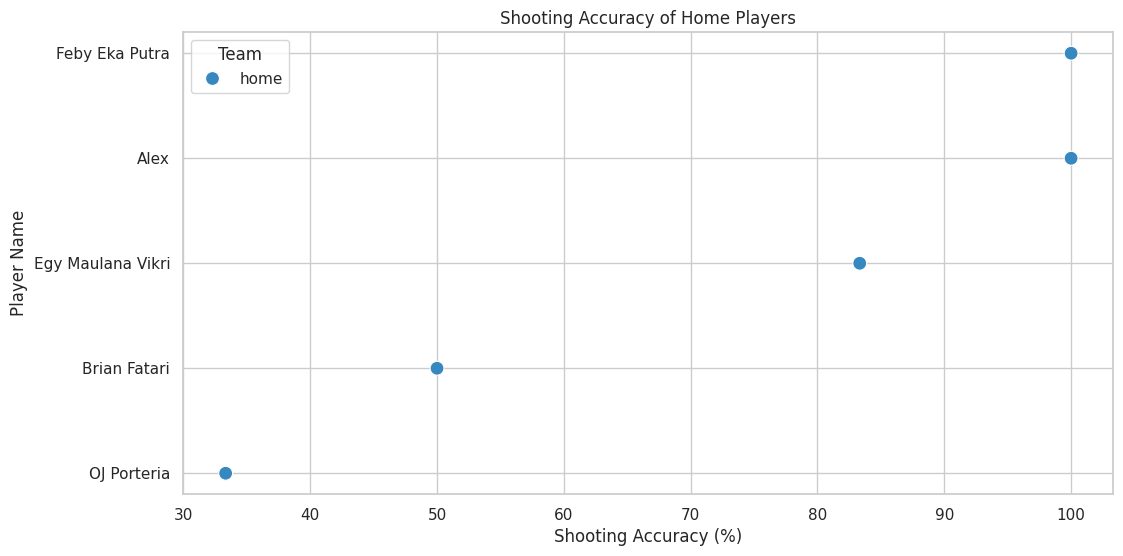

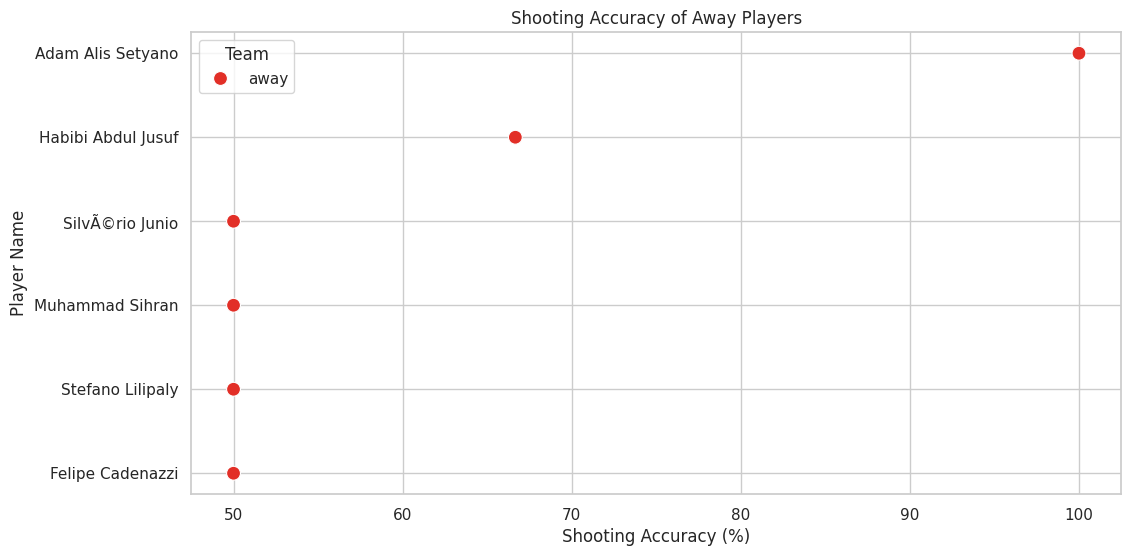

In [ ]:
# Hitung akurasi tembakan untuk setiap pemain
df['shootingAccuracy'] = df['onTargetScoringAttempt'] / (df['onTargetScoringAttempt'] + df['shotOffTarget']) * 100

# Filter pemain yang memiliki setidaknya satu tembakan tepat sasaran
df_filtered = df[df['onTargetScoringAttempt'] > 0][['name', 'team', 'shootingAccuracy']]

# Pisahkan data menjadi pertandingan kandang dan tandang
home_df = df_filtered[df_filtered['team'] == 'home']
away_df = df_filtered[df_filtered['team'] == 'away']

# Plot Titik untuk Pertandingan Kandang
plt.figure(figsize=(12, 6))
sns.scatterplot(x='shootingAccuracy', y='name', data=home_df.sort_values('shootingAccuracy', ascending=False), hue='team', palette='Blues_d', s=100, marker='o')
plt.title('Shooting Accuracy of Home Players')
plt.xlabel('Shooting Accuracy (%)')
plt.ylabel('Player Name')
plt.legend(title='Team', loc='best')
plt.grid(True)
plt.show()

# Plot Titik untuk Pertandingan Tandang
plt.figure(figsize=(12, 6))
sns.scatterplot(x='shootingAccuracy', y='name', data=away_df.sort_values('shootingAccuracy', ascending=False), hue='team', palette='Reds_d', s=100, marker='o')
plt.title('Shooting Accuracy of Away Players')
plt.xlabel('Shooting Accuracy (%)')
plt.ylabel('Player Name')
plt.legend(title='Team', loc='best')
plt.grid(True)
plt.show()

Berdasarkan kedua gambar yang menunjukkan akurasi shooting pemain tim tuan rumah (home) dan tim tamu (away), berikut analisis dan insight yang dapat diambil:

1. Distribusi Akurasi:
   - Tim tuan rumah (home) memiliki variasi akurasi yang lebih luas, mulai dari sekitar 30% hingga 100%.
   - Tim tamu (away) memiliki distribusi yang lebih terpusat, dengan mayoritas pemain memiliki akurasi sekitar 50%.

2. Pemain Terbaik:
   - Untuk tim tuan rumah, Feby Eka Putra dan Alex menunjukkan akurasi shooting tertinggi, mencapai hampir 100%.
   - Untuk tim tamu, Adam Alis Setyano memiliki akurasi shooting tertinggi, mendekati 100%.

3. Konsistensi:
   - Tim tamu terlihat lebih konsisten dalam akurasi shooting, meskipun rata-rata lebih rendah.
   - Tim tuan rumah memiliki beberapa pemain dengan akurasi sangat tinggi, tapi juga beberapa dengan akurasi rendah.

4. Performa Terendah:
   - OJ Porteria dari tim tuan rumah memiliki akurasi shooting terendah, sekitar 30%.
   - Beberapa pemain tim tamu (Silvério Junio, Muhammad Sihran, Stefano Lilipaly, Felipe Cadenazzi) memiliki akurasi sekitar 50%.

5. Pemain Kunci:
   - Egy Maulana Vikri dari tim tuan rumah memiliki akurasi shooting yang cukup baik (sekitar 80%), yang bisa menjadi ancaman bagi tim lawan.
   - Habibi Abdul Jusuf dari tim tamu memiliki akurasi di atas rata-rata timnya (sekitar 70%), menjadikannya aset penting dalam serangan.

Insight dan Implikasi:
1. Strategi Menyerang:
   - Tim tuan rumah mungkin lebih mengandalkan Feby Eka Putra dan Alex untuk penyelesaian akhir, mengingat akurasi mereka yang sangat tinggi.
   - Tim tamu mungkin memiliki pendekatan yang lebih kolektif dalam menyerang, dengan distribusi akurasi yang lebih merata.

2. Peluang Pengembangan:
   - Tim tuan rumah bisa fokus pada peningkatan konsistensi akurasi shooting di seluruh tim.
   - Tim tamu mungkin perlu meningkatkan akurasi shooting secara keseluruhan, terutama untuk pemain-pemain kunci mereka.

3. Taktik Pertahanan:
   - Tim tamu harus sangat waspada terhadap Feby Eka Putra dan Alex dari tim tuan rumah.
   - Tim tuan rumah perlu mewaspadai Adam Alis Setyano dari tim tamu.

4. Keputusan Pelatih:
   - Pelatih tim tuan rumah mungkin akan lebih sering memberikan kesempatan shooting kepada pemain-pemain dengan akurasi tinggi.
   - Pelatih tim tamu mungkin akan mendorong lebih banyak upaya shooting dari berbagai pemain untuk memanfaatkan konsistensi tim.

Kesimpulan:
Tim tuan rumah memiliki beberapa pemain dengan akurasi shooting yang sangat tinggi, yang bisa menjadi keunggulan dalam penyelesaian akhir. Sementara tim tamu memiliki akurasi yang lebih konsisten di antara para pemainnya, yang bisa mengindikasikan pendekatan yang lebih tim-oriented dalam menyerang. Kedua tim memiliki kekuatan dan kelemahan masing-masing dalam hal akurasi shooting, yang akan mempengaruhi strategi dan taktik mereka dalam pertandingan.

## Hasil duel di udara dari masing-masing tim

<ipython-input-252-8ea4df507a4b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aerialSuccessRate', y='shortName', data=team_df.sort_values('aerialSuccessRate', ascending=False), palette=[color])
<ipython-input-252-8ea4df507a4b>:15: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='aerialSuccessRate', y='shortName', data=team_df.sort_values('aerialSuccessRate', ascending=False), palette=[color])


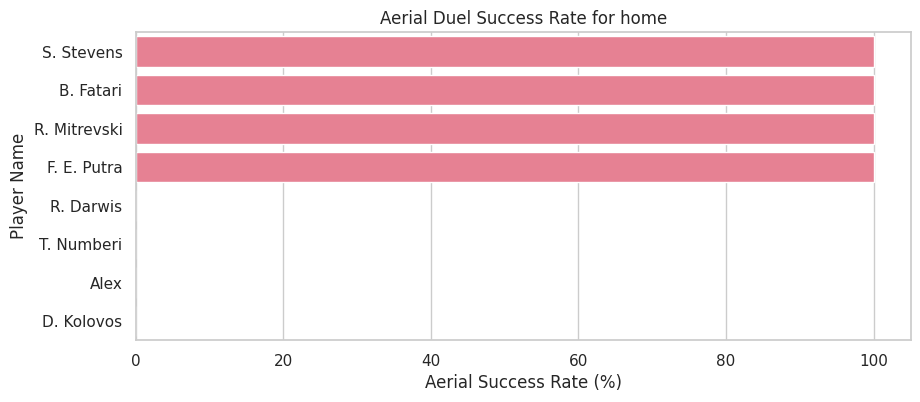

<ipython-input-252-8ea4df507a4b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aerialSuccessRate', y='shortName', data=team_df.sort_values('aerialSuccessRate', ascending=False), palette=[color])
<ipython-input-252-8ea4df507a4b>:15: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='aerialSuccessRate', y='shortName', data=team_df.sort_values('aerialSuccessRate', ascending=False), palette=[color])


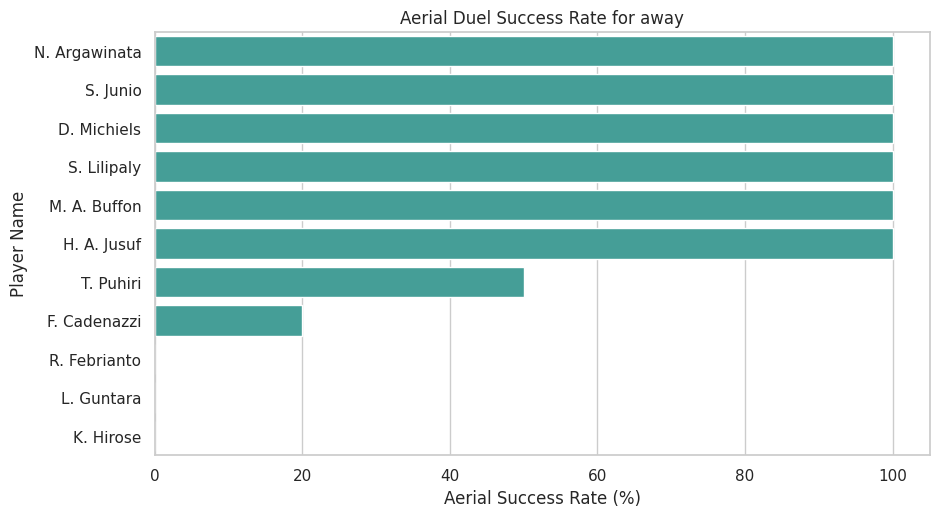

In [ ]:
# Hitung tingkat keberhasilan duel udara
df['aerialSuccessRate'] = df['aerialWon'] / (df['aerialWon'] + df['aerialLost']) * 100

# Filter pemain yang memiliki duel udara lebih dari nol
df_filtered = df[(df['aerialWon'] + df['aerialLost']) > 0]

# Pisahkan data berdasarkan tim
teams = df_filtered['team'].unique()
colors = sns.color_palette("husl", len(teams))

for team, color in zip(teams, colors):
    team_df = df_filtered[df_filtered['team'] == team]

    plt.figure(figsize=(10, len(team_df) * 0.5))
    sns.barplot(x='aerialSuccessRate', y='shortName', data=team_df.sort_values('aerialSuccessRate', ascending=False), palette=[color])
    plt.title(f'Aerial Duel Success Rate for {team}')
    plt.xlabel('Aerial Success Rate (%)')
    plt.ylabel('Player Name')
    plt.show()

Berdasarkan kedua gambar yang diatas, kita dapat melihat hasil duel udara (aerial duel success rate) untuk tim kandang (home) dan tim tamu (away). Berikut adalah insight penting beserta penjelasannya:

1. Performa tim kandang vs tim tamu:
Tim kandang memiliki 5 pemain dengan tingkat keberhasilan duel udara 100%, sementara tim tamu memiliki 6 pemain dengan tingkat keberhasilan yang sama. Ini menunjukkan bahwa kedua tim memiliki kekuatan yang cukup seimbang dalam hal duel udara.

2. Konsistensi performa:
Tim kandang menunjukkan konsistensi yang lebih tinggi, dengan semua pemain yang tercatat memiliki tingkat keberhasilan 100%. Sementara itu, tim tamu memiliki variasi performa yang lebih besar, dengan beberapa pemain memiliki tingkat keberhasilan yang lebih rendah.

3. Kedalaman squad:
Tim tamu memiliki lebih banyak pemain yang tercatat dalam statistik ini (11 pemain) dibandingkan tim kandang (8 pemain). Ini mungkin menunjukkan bahwa tim tamu memiliki lebih banyak opsi atau rotasi pemain dalam pertandingan.

4. Pemain kunci:
Pemain seperti S. Stevens, B. Fatari, R. Mitrevski (tim kandang) dan N. Argawinata, S. Junio, D. Michiels (tim tamu) menunjukkan performa yang sangat baik dalam duel udara. Mereka bisa menjadi pemain kunci dalam strategi tim, terutama untuk bola-bola atas.

5. Area yang perlu ditingkatkan:
Beberapa pemain tim tamu seperti T. Puhiri (sekitar 50%) dan F. Cadenazzi (sekitar 20%) memiliki tingkat keberhasilan yang lebih rendah. Ini bisa menjadi area fokus untuk peningkatan performa tim.

Pentingnya insight ini:

1. Strategi pertandingan: Pemahaman tentang kekuatan dan kelemahan tim dalam duel udara dapat mempengaruhi strategi permainan, seperti penggunaan umpan panjang atau taktik bola mati.

2. Seleksi pemain: Pelatih dapat memutuskan pemain mana yang akan dimainkan berdasarkan kemampuan mereka dalam duel udara, terutama saat menghadapi lawan yang kuat dalam aspek ini.

3. Pelatihan yang ditargetkan: Tim dapat fokus pada peningkatan kemampuan duel udara pemain-pemain tertentu yang memiliki performa lebih rendah.

4. Analisis lawan: Data ini dapat digunakan untuk menganalisis kekuatan dan kelemahan lawan dalam duel udara, membantu dalam persiapan pertandingan.

5. Evaluasi performa: Statistik ini memberikan cara objektif untuk mengevaluasi kontribusi pemain dalam aspek penting permainan ini.

Dengan memahami dan memanfaatkan insight ini, tim dapat mengoptimalkan strategi dan performa mereka, yang pada akhirnya dapat meningkatkan peluang untuk meraih hasil positif dalam pertandingan.

## Poin kelemahan dan kekuatan masing-masing tim

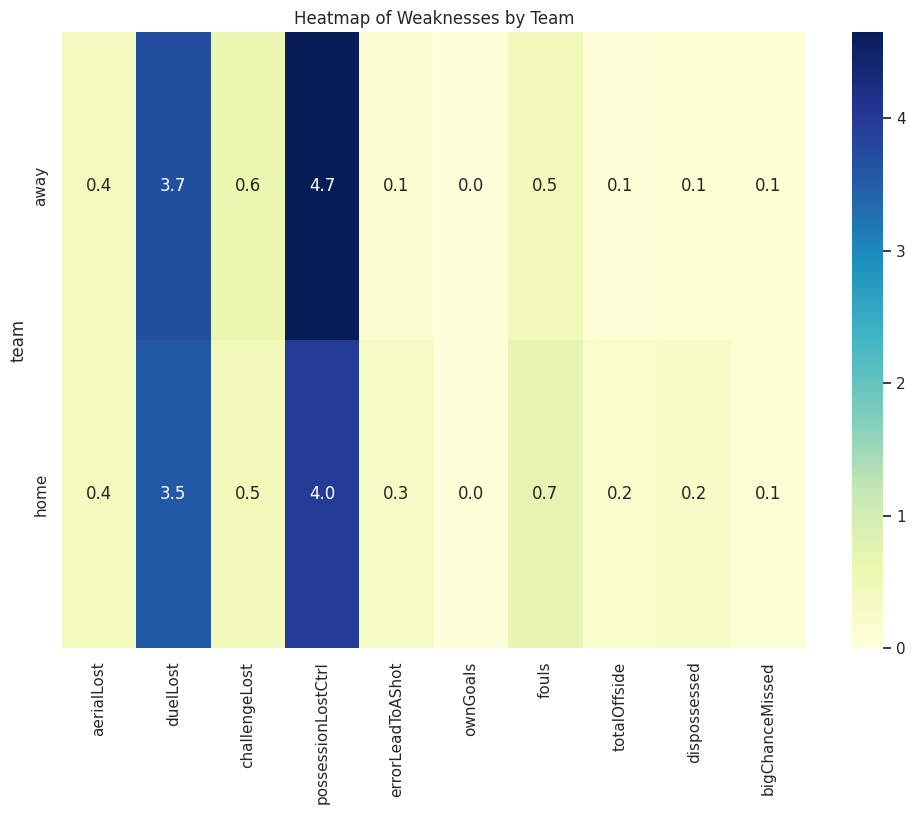

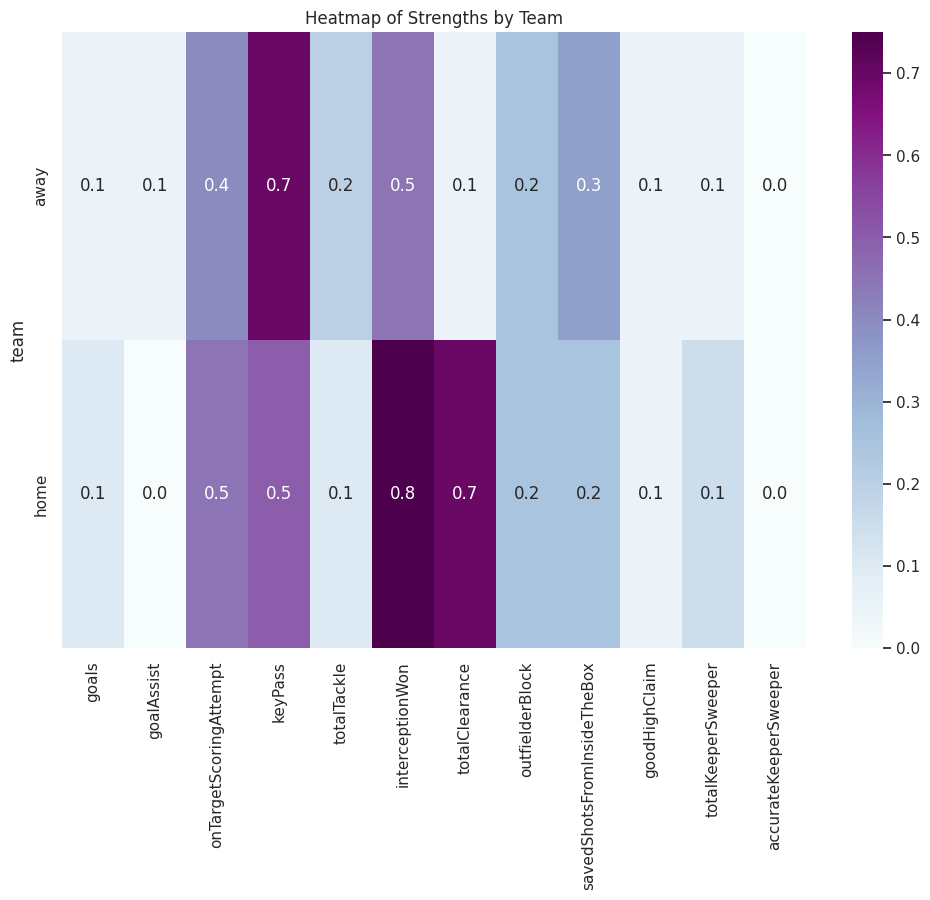

In [ ]:
# Define metrics
weakness_metrics = [
    'aerialLost', 'duelLost', 'challengeLost', 'possessionLostCtrl',
    'errorLeadToAShot', 'ownGoals', 'fouls', 'totalOffside',
    'dispossessed', 'bigChanceMissed'
]

strength_metrics = [
    'goals', 'goalAssist', 'onTargetScoringAttempt', 'keyPass',
    'totalTackle', 'interceptionWon', 'totalClearance', 'outfielderBlock',
    'savedShotsFromInsideTheBox', 'goodHighClaim', 'totalKeeperSweeper',
    'accurateKeeperSweeper'
]

columns_to_convert = weakness_metrics + strength_metrics
df[columns_to_convert] = df[columns_to_convert].replace({',': '.'}, regex=True)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

team_weakness_stats = df.groupby('team')[weakness_metrics].mean().reset_index()
team_strength_stats = df.groupby('team')[strength_metrics].mean().reset_index()

# Heatmap untuk weaknesses
plt.figure(figsize=(12, 8))
sns.heatmap(team_weakness_stats.set_index('team'), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap of Weaknesses by Team')
plt.show()

# Heatmap untuk strengths
plt.figure(figsize=(12, 8))
sns.heatmap(team_strength_stats.set_index('team'), annot=True, cmap='BuPu', fmt='.1f')
plt.title('Heatmap of Strengths by Team')
plt.show()

Berdasarkan heatmap kelemahan dan kekuatan yang ditampilkan, berikut adalah analisis poin-poin kelemahan dan kekuatan masing-masing tim:

Tim Kandang (Home):

Kelemahan:
1. Possession Lost (4.0) - Kehilangan penguasaan bola yang cukup tinggi
2. Duel Lost (3.5) - Kalah dalam duel satu lawan satu

Kekuatan:
1. Interception Won (0.8) - Baik dalam melakukan intersepsi
2. Total Clearance (0.7) - Mampu melakukan pembersihan bola dengan baik
3. Key Pass (0.5) - Cukup baik dalam memberikan umpan-umpan kunci
4. Attempt (0.5) - Memiliki upaya mencetak gol yang cukup baik

Tim Tamu (Away):

Kelemahan:
1. Possession Lost (4.7) - Sangat sering kehilangan penguasaan bola
2. Duel Lost (3.7) - Kalah dalam duel satu lawan satu

Kekuatan:
1. Key Pass (0.7) - Sangat baik dalam memberikan umpan-umpan kunci
2. Interception Won (0.5) - Cukup baik dalam melakukan intersepsi
3. Attempt (0.4) - Memiliki upaya mencetak gol yang cukup
4. Saved Shots From Inside The Box (0.3) - Cukup baik dalam menyelamatkan tembakan dari dalam kotak penalti

Analisis:
1. Kedua tim memiliki kelemahan utama yang sama, yaitu sering kehilangan bola (possession lost) dan kalah dalam duel. Namun, tim tamu memiliki angka yang lebih tinggi dalam hal kehilangan bola.

2. Tim kandang lebih unggul dalam hal pertahanan, terlihat dari nilai interception won dan total clearance yang lebih tinggi.

3. Tim tamu lebih unggul dalam menciptakan peluang, terlihat dari nilai key pass yang lebih tinggi.

4. Tim kandang sedikit lebih baik dalam hal attempt (upaya mencetak gol), namun tim tamu lebih baik dalam menyelamatkan tembakan dari dalam kotak penalti.

5. Kedua tim memiliki kekuatan dan kelemahan yang berbeda, yang bisa memengaruhi strategi permainan mereka.

Insight ini penting karena:
1. Membantu pelatih dalam menyusun strategi yang memanfaatkan kekuatan tim dan mengeksploitasi kelemahan lawan.
2. Memberikan gambaran area yang perlu ditingkatkan oleh masing-masing tim.
3. Dapat digunakan untuk memilih formasi dan pemain yang paling sesuai untuk menghadapi lawan.
4. Membantu dalam analisis performa tim dan evaluasi pasca pertandingan.
5. Memberikan wawasan tentang gaya permainan masing-masing tim dan bagaimana mereka mungkin akan berinteraksi di lapangan.

## Melihat detail statistik performa salah satu pemain

<ipython-input-254-153c9ac31f9a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_zero_metrics[filtered_defensive_metrics].index, y=non_zero_metrics[filtered_defensive_metrics].values, ax=axes[0, 0], palette='Blues_d')
<ipython-input-254-153c9ac31f9a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_zero_metrics[filtered_offensive_metrics].index, y=non_zero_metrics[filtered_offensive_metrics].values, ax=axes[0, 1], palette='Oranges_d')
<ipython-input-254-153c9ac31f9a>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_zero

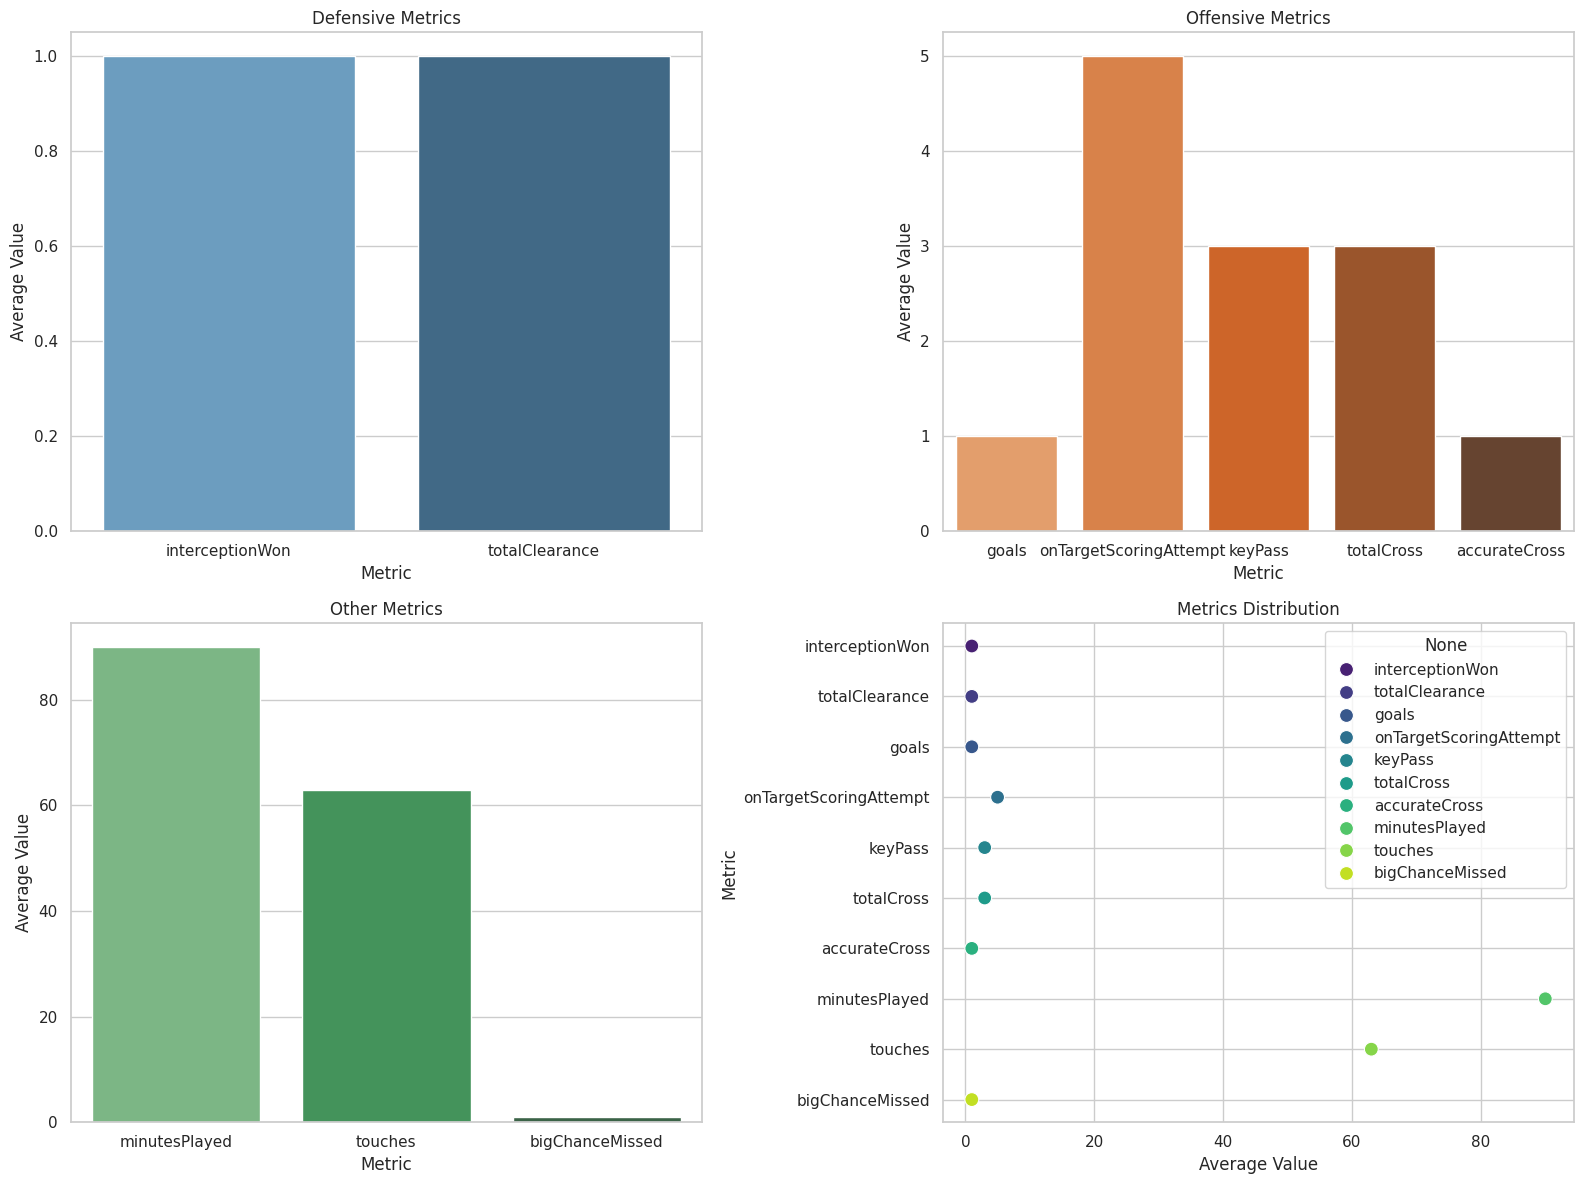

In [ ]:
# Pilih pemain yang ingin dianalisis
player_name = 'Egy Maulana Vikri'
player_df = df[df['name'] == player_name]

# Definisikan metrik
defensive_metrics = [
    'totalTackle', 'interceptionWon', 'totalClearance', 'outfielderBlock',
    'saves', 'goodHighClaim', 'totalKeeperSweeper'
]
offensive_metrics = [
    'goals', 'goalAssist', 'onTargetScoringAttempt', 'keyPass',
    'totalCross', 'accurateCross'
]
other_metrics = [
    'minutesPlayed', 'touches', 'dispossessed', 'bigChanceCreated',
    'bigChanceMissed', 'hitWoodwork'
]

# Menghitung rata-rata metrik
player_stats = player_df[defensive_metrics + offensive_metrics + other_metrics].mean()

# Filter metrik yang memiliki nilai 0
non_zero_metrics = player_stats[player_stats > 0]

# Pisahkan metrik berdasarkan kategori
filtered_defensive_metrics = [metric for metric in defensive_metrics if metric in non_zero_metrics.index]
filtered_offensive_metrics = [metric for metric in offensive_metrics if metric in non_zero_metrics.index]
filtered_other_metrics = [metric for metric in other_metrics if metric in non_zero_metrics.index]

# Visualisasi Performansi Pemain
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Barplot untuk metrik defensif
if filtered_defensive_metrics:
    sns.barplot(x=non_zero_metrics[filtered_defensive_metrics].index, y=non_zero_metrics[filtered_defensive_metrics].values, ax=axes[0, 0], palette='Blues_d')
    axes[0, 0].set_title('Defensive Metrics')
    axes[0, 0].set_ylabel('Average Value')
    axes[0, 0].set_xlabel('Metric')
else:
    axes[0, 0].text(0.5, 0.5, 'No Defensive Metrics Available', horizontalalignment='center', verticalalignment='center', fontsize=14)

# Barplot untuk metrik ofensif
if filtered_offensive_metrics:
    sns.barplot(x=non_zero_metrics[filtered_offensive_metrics].index, y=non_zero_metrics[filtered_offensive_metrics].values, ax=axes[0, 1], palette='Oranges_d')
    axes[0, 1].set_title('Offensive Metrics')
    axes[0, 1].set_ylabel('Average Value')
    axes[0, 1].set_xlabel('Metric')
else:
    axes[0, 1].text(0.5, 0.5, 'No Offensive Metrics Available', horizontalalignment='center', verticalalignment='center', fontsize=14)

# Barplot untuk metrik lainnya
if filtered_other_metrics:
    sns.barplot(x=non_zero_metrics[filtered_other_metrics].index, y=non_zero_metrics[filtered_other_metrics].values, ax=axes[1, 0], palette='Greens_d')
    axes[1, 0].set_title('Other Metrics')
    axes[1, 0].set_ylabel('Average Value')
    axes[1, 0].set_xlabel('Metric')
else:
    axes[1, 0].text(0.5, 0.5, 'No Other Metrics Available', horizontalalignment='center', verticalalignment='center', fontsize=14)

# Dot plot untuk distribusi metrik
if not non_zero_metrics.empty:
    sns.scatterplot(x=non_zero_metrics.values, y=non_zero_metrics.index, hue=non_zero_metrics.index, palette='viridis', s=100, ax=axes[1, 1])
    axes[1, 1].set_title('Metrics Distribution')
    axes[1, 1].set_xlabel('Average Value')
    axes[1, 1].set_ylabel('Metric')
else:
    axes[1, 1].text(0.5, 0.5, 'No Metrics Available', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()

Berdasarkan gambar yang ditampilkan, kita dapat melihat detail statistik performa seorang pemain dalam berbagai aspek permainan. Mari kita analisis data tersebut:

1. Metrik Defensif:
   - Interception Won: 1.0
   - Total Clearance: 1.0
   Pemain ini menunjukkan kemampuan defensif yang solid, dengan nilai maksimal untuk intersepsi dan pembersihan bola.

2. Metrik Ofensif:
   - Goals: 1.0
   - On Target Scoring Attempt: 5.0
   - Key Pass: 3.0
   - Total Cross: 3.0
   - Accurate Cross: 1.0
   Pemain ini terlihat aktif dalam serangan, dengan 5 percobaan tembakan tepat sasaran dan 3 umpan kunci.

3. Metrik Lainnya:
   - Minutes Played: 90 (asumsi berdasarkan grafik)
   - Touches: sekitar 63
   - Big Chance Missed: mendekati 0 (sangat rendah)

4. Distribusi Metrik:
   - Pemain bermain penuh 90 menit
   - Memiliki jumlah sentuhan bola yang cukup tinggi (63)
   - Hampir tidak ada peluang besar yang terlewatkan

Insight penting:
1. Pemain ini tampaknya all-rounder, berkontribusi baik di pertahanan maupun serangan.
2. Tingginya jumlah on-target scoring attempt (5) menunjukkan pemain ini sering mencoba mencetak gol dan akurat.
3. 3 key passes menandakan pemain ini juga berperan sebagai playmaker.
4. Kemampuan bertahan yang baik (interception dan clearance) menunjukkan pemain ini mungkin bermain di posisi gelandang atau bek yang sering membantu serangan.
5. Jumlah sentuhan bola yang tinggi (63) menunjukkan pemain ini sering terlibat dalam permainan dan mungkin menjadi pusat distribusi bola tim.

Mengapa insight ini penting:
1. Membantu pelatih memahami kontribusi pemain di berbagai aspek permainan.
2. Dapat digunakan untuk menentukan peran taktis pemain dalam tim.
3. Membantu identifikasi kekuatan pemain untuk dioptimalkan dan kelemahan untuk ditingkatkan.
4. Berguna untuk evaluasi performa dan pengambilan keputusan terkait strategi tim.
5. Dapat digunakan sebagai dasar untuk perbandingan dengan pemain lain atau standar posisi tertentu.

Kesimpulannya, pemain ini menunjukkan performa yang seimbang dan berkontribusi signifikan dalam berbagai aspek permainan, menjadikannya aset berharga bagi tim.

## Kedisiplinan masing-masing tim



<ipython-input-255-449dc7dc1175>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y=(metric, 'sum'), data=team_discipline_stats, palette='coolwarm')
<ipython-input-255-449dc7dc1175>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y=(metric, 'sum'), data=team_discipline_stats, palette='coolwarm')
<ipython-input-255-449dc7dc1175>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y=(metric, 'sum'), data=team_discipline_stats, palette='coolwarm')
<ipython-input-255-449dc7dc1175>:13: FutureWarning: 

Passing `pale

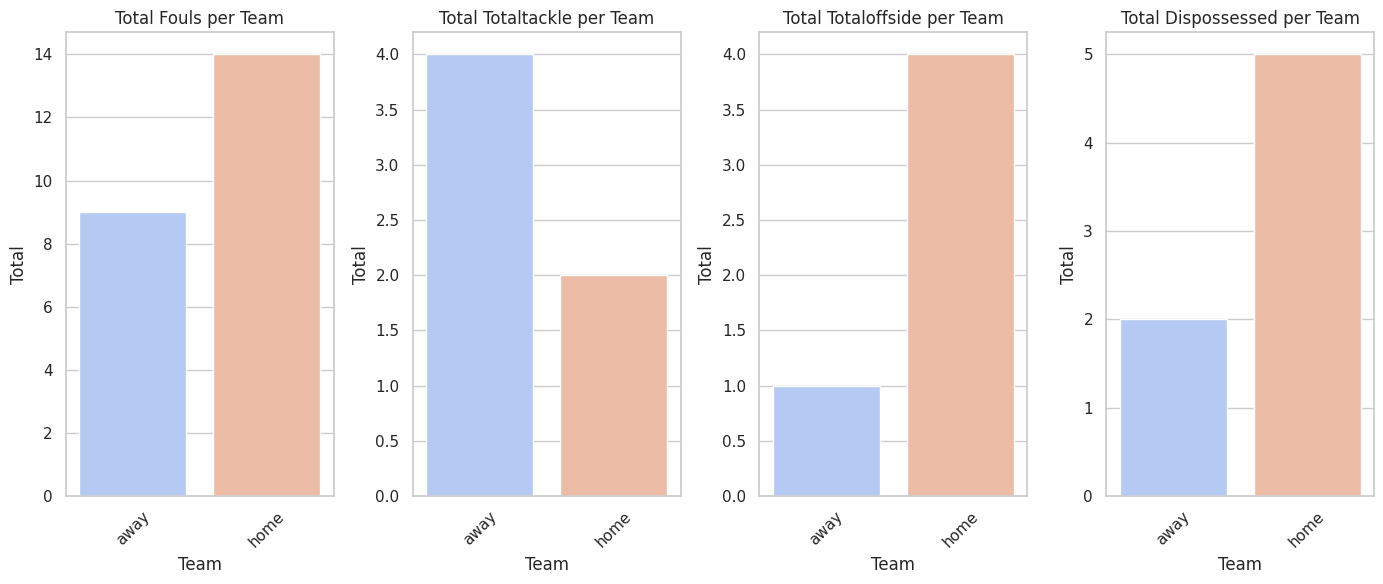

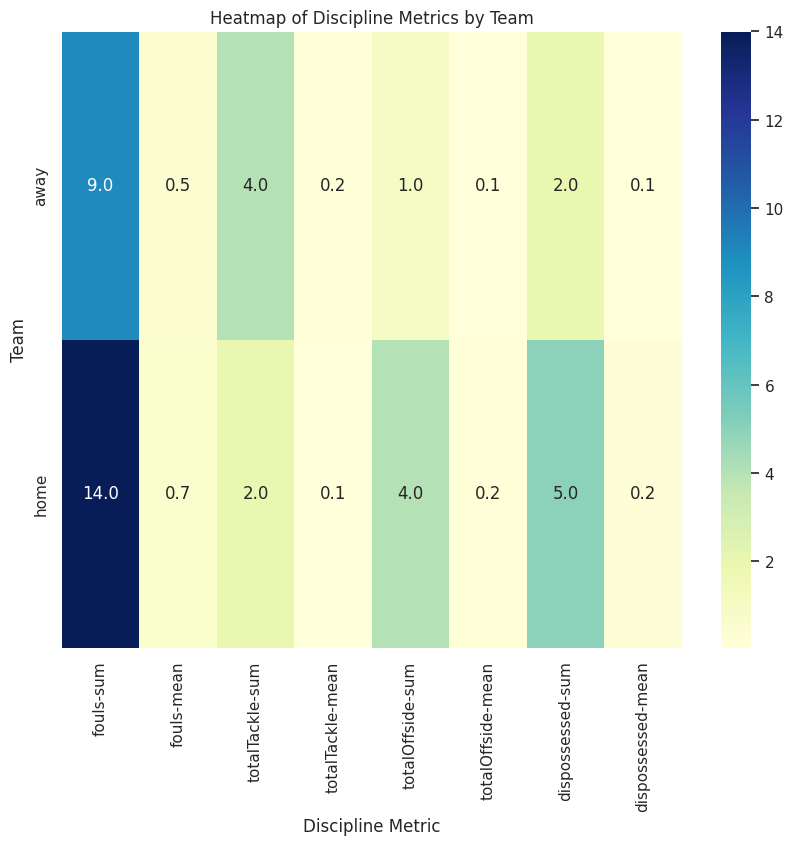

In [ ]:
# Asumsi kolom terkait kedisiplinan
discipline_metrics = [
    'fouls', 'totalTackle', 'totalOffside', 'dispossessed'
]

# Menghitung total dan rata-rata metrik kedisiplinan per tim
team_discipline_stats = df.groupby('team')[discipline_metrics].agg(['sum', 'mean']).reset_index()

# Visualisasi Bar Plot untuk total pelanggaran dan penalti
plt.figure(figsize=(14, 6))
for metric in discipline_metrics:
    plt.subplot(1, len(discipline_metrics), discipline_metrics.index(metric) + 1)
    sns.barplot(x='team', y=(metric, 'sum'), data=team_discipline_stats, palette='coolwarm')
    plt.title(f'Total {metric.replace("_", " ").title()} per Team')
    plt.ylabel('Total')
    plt.xlabel('Team')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualisasi Heatmap untuk rata-rata pelanggaran dan penalti
plt.figure(figsize=(10, 8))
sns.heatmap(team_discipline_stats.set_index('team').astype(float), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap of Discipline Metrics by Team')
plt.xlabel('Discipline Metric')
plt.ylabel('Team')
plt.show()

Pemahaman mendalam tentang tingkat kedisiplinan setiap tim dalam suatu kompetisi sangat krusial karena beberapa alasan:

1. Strategi Pertandingan: Tim dengan tingkat pelanggaran tinggi mungkin lebih agresif atau bermain lebih keras, sementara tim dengan banyak pelanggaran offside mungkin lebih sering mencoba umpan panjang. Memahami pola ini dapat membantu dalam merumuskan strategi permainan yang efektif.
2. Evaluasi Kinerja Pemain: Metrik seperti jumlah tekel dan perampasan bola dapat memberikan gambaran tentang kontribusi individu dalam menjaga disiplin tim.
Perbandingan Tim: Membandingkan metrik disiplin antar tim dapat mengidentifikasi tim mana yang memiliki disiplin yang lebih baik secara keseluruhan.
3. Evaluasi Pelatih: Kinerja pelatih juga dapat dinilai berdasarkan sejauh mana ia mampu menjaga disiplin timnya.
Pencegahan Cedera: Tim dengan tingkat pelanggaran tinggi berpotensi lebih sering terlibat dalam kontak fisik yang keras, yang dapat meningkatkan risiko cedera.
Interpretasi Hasil Berdasarkan Gambar

Berdasarkan heatmap, kita dapat menarik beberapa kesimpulan awal:

* Tim "Home" vs "Away": Tim "Home" secara keseluruhan memiliki jumlah pelanggaran (fouls-sum) yang lebih tinggi dibandingkan tim "Away". Ini bisa mengindikasikan bahwa tim "Home" mungkin bermain lebih agresif atau menghadapi tekanan yang lebih besar saat bermain di kandang.
Namun, jika kita melihat rata-rata pelanggaran per pertandingan (fouls-mean), perbedaannya tidak terlalu signifikan. Ini menunjukkan bahwa meskipun total pelanggaran tim "Home" lebih tinggi, rata-rata per pertandingan tidak jauh berbeda dengan tim "Away".

* Metrik Lainnya:
Jumlah tekel (totalTackle-sum dan totalTackle-mean): Kedua tim tampaknya memiliki jumlah tekel yang cukup seimbang, menunjukkan bahwa kedua tim sama-sama aktif dalam mencoba menghentikan serangan lawan.
Pelanggaran offside (totalOffside-sum dan totalOffside-mean): Tim "Home" memiliki jumlah pelanggaran offside yang lebih tinggi. Ini bisa mengindikasikan bahwa tim "Home" mungkin lebih sering mencoba umpan panjang atau serangan balik cepat.
Perampasan bola (dispossessed-sum dan dispossessed-mean): Kedua tim juga memiliki jumlah perampasan bola yang relatif sama, menunjukkan bahwa kedua tim sama-sama efektif dalam merebut kembali bola dari lawan.


# FEATURE CREATION

Membuat 3 Fitur Baru dari dataset

## EffectivePasses

**Deskripsi**: EffectivePasses merupakan jumlah umpan yang berhasil ditujukan langsung ke pemain yang menerima bola, yang dihitung dari akurasi umpan dan total umpan.

**Alasan**: Fitur ini membantu mengukur seberapa efektif seorang pemain dalam melakukan umpan yang memberikan dampak langsung pada permainan. Ini memperhitungkan umpan yang akurat dan memperbaiki pengukuran akurasi umpan dengan memasukkan informasi tentang umpan yang total. Ini juga dapat membantu dalam menganalisis keterlibatan pemain dalam membangun serangan.

In [ ]:
df['effectivePasses'] = df['accuratePass'] + df['totalPass'] - df['totalPass'] * (1 - df['passAccuracy'] / 100)

## DefensiveContribution


**Deskripsi**: defensiveContribution mengukur kontribusi defensif pemain dengan mempertimbangkan beberapa metrik defensif sekaligus.

**Alasan**: Fitur ini memberikan gambaran komprehensif tentang kontribusi defensif seorang pemain dengan menggabungkan berbagai metrik defensif menjadi satu nilai. Ini memudahkan evaluasi pemain dalam hal efektivitas mereka dalam aspek pertahanan tanpa harus menganalisis setiap metrik secara terpisah.

In [ ]:
df['defensiveContribution'] = df['interceptionWon'] + df['totalTackle'] + df['clearanceOffLine'] + df['outfielderBlock']

## OffensivePressure

**Deskripsi**: offensivePressure mengukur seberapa aktif seorang pemain dalam memberikan tekanan ofensif dengan menghitung total upaya ofensif mereka.

**Alasan**: Fitur ini memberikan gambaran tentang seberapa banyak pemain berusaha dalam menciptakan peluang serangan, baik dengan tembakan on target, umpan silang, atau umpan kunci. Ini berguna untuk menilai seberapa aktif dan efektif pemain dalam menciptakan peluang untuk tim mereka.

In [ ]:
df['offensivePressure'] = df['onTargetScoringAttempt'] + df['totalCross'] + df['keyPass']